In [113]:
import pandas as pd

In [114]:
#Trying hts
!pip install scikit-hts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
data_raw = pd.read_csv('/content/sample_data/Hackathon Data Compressed.zip', compression = 'gzip')
# data_raw = pd.read_csv('/content/sample_data/Hackathon Data Compressed.zipd', compression = 'gzip')

In [116]:
data_raw.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,month,year,Date,gscpi,Month,Customer_Sentiment_Index
0,1,2017-05-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
1,1,2017-05-29,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
2,1,2017-05-30,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
3,1,2017-05-31,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
4,1,2017-06-01,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,6,2017,2017-06-30,0.127618,June,95.0


In [117]:
data = data_raw.copy(deep = True)

In [118]:
data.columns = [col_name.lower() for col_name in data.columns]

In [119]:
data["subclass_name"] = data["subclass_name"].apply(lambda x: x.lower().replace("-", "_").replace(" ", ""))
data["class_name"] = data["class_name"].apply(lambda x: x.lower().replace("-", "_").replace(" ", ""))
data["ml_name"] = data["ml_name"].apply(lambda x: x.lower().replace("-", "_").replace(" ", ""))
data["category_name"] = data["category_name"].apply(lambda x: x.lower().replace("-", "_").replace(" ", ""))

In [120]:
pd.set_option('max_colwidth', 100)
data['encoded_sku_id'].head()

0    1
1    1
2    1
3    1
4    1
Name: encoded_sku_id, dtype: int64

In [121]:
data.tail()

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,daily_units,month,year,date,gscpi,month,customer_sentiment_index
846627,575,2022-07-27,instantprinthw,cameras_p&s,ml_p&sandactioncamsanddrones,vp_digitalimaging,149.99,NaN,NaN,Fully-Stocked,0,7,2022,2022-07-31,1.783795,July,51.5
846628,575,2022-07-28,instantprinthw,cameras_p&s,ml_p&sandactioncamsanddrones,vp_digitalimaging,149.99,NaN,NaN,Fully-Stocked,0,7,2022,2022-07-31,1.783795,July,51.5
846629,575,2022-07-29,instantprinthw,cameras_p&s,ml_p&sandactioncamsanddrones,vp_digitalimaging,149.99,NaN,NaN,Fully-Stocked,2,7,2022,2022-07-31,1.783795,July,51.5
846630,575,2022-07-30,instantprinthw,cameras_p&s,ml_p&sandactioncamsanddrones,vp_digitalimaging,149.99,NaN,124.95,Fully-Stocked,2,7,2022,2022-07-31,1.783795,July,51.5
846631,575,2022-07-31,instantprinthw,cameras_p&s,ml_p&sandactioncamsanddrones,vp_digitalimaging,149.99,NaN,124.95,Fully-Stocked,1,7,2022,2022-07-31,1.783795,July,51.5


In [122]:
data['ml_name'] = data['category_name']+ "_" + data['ml_name']
data['class_name'] = data['ml_name']+ "_" + data['class_name']
data['subclass_name'] = data['class_name']+ "_" + data['subclass_name']
data['encoded_sku_id'] = data['subclass_name']+ "_"+ data['encoded_sku_id'].astype(str)

In [123]:
category = data["category_name"].unique()
ml =  data["ml_name"].unique()
classes = data["class_name"].unique()
subclass  = data["subclass_name"].unique()
skus  =  data["encoded_sku_id"].unique()



In [124]:
ml

array(['vp_digitalimaging_ml_diaccessories',
       'vp_electrify&car_ml_connectedcar',
       'vp_majorappliances_ml_kitchen',
       'vp_digitalimaging_ml_p&sandactioncamsanddrones',
       'vp_digitalimaging_ml_ilccameras/lenses',
       'vp_majorappliances_ml_laundry', 'vp_majorappliances_ml_premium',
       'vp_electrify&car_ml_electrify'], dtype=object)

In [125]:
total = {'total': list(category)}
category_h = {k: [v for v in classes if v.startswith(k)] for k in category}
ml_h = {k: [v for v in classes if v.startswith(k)] for k in ml}
class_h = {k: [v for v in subclass if v.startswith(k)] for k in classes}
subclass_h = {k: [v for v in skus if v.startswith(k)] for k in subclass}


In [126]:
df_bottom_level = data.pivot(index="sales_date", columns="encoded_sku_id", values="daily_units")
df_middle_level_1 = data.groupby(["sales_date", "subclass_name"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="sales_date", columns="subclass_name", values="daily_units")
df_middle_level_2 = data.groupby(["sales_date", "class_name"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="sales_date", columns="class_name", values="daily_units")
                    
df_middle_level_3 = data.groupby(["sales_date", "ml_name"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="sales_date", columns="ml_name", values="daily_units")
                    
                    
df_middle_level_4 = data.groupby(["sales_date", "category_name"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="sales_date", columns="category_name", values="daily_units")

df_total = data.groupby("sales_date")["daily_units"] \
             .sum() \
             .to_frame() \
             .rename(columns={"daily_units": "total"})

In [127]:
df_total

,total
sales_date,
2017-05-28,0
2017-05-29,0
2017-05-30,0
2017-05-31,0
2017-06-01,0
...,...
2022-07-27,1839
2022-07-28,1859
2022-07-29,2292


In [128]:
df_bottom_level.fillna(0, inplace = True)
df_middle_level_1.fillna(0, inplace = True)
df_middle_level_2.fillna(0, inplace = True)
df_middle_level_3.fillna(0, inplace = True)
df_middle_level_4.fillna(0, inplace = True)
df_total.fillna(0, inplace = True)

In [129]:
hierarchy_df = pd.DataFrame()
hierarchy_df.index = pd.to_datetime(df_bottom_level.index)
hierarchy_df = df_bottom_level.merge(df_middle_level_1, on = 'sales_date').merge(df_middle_level_2, on = 'sales_date').merge(df_middle_level_3, on = 'sales_date').merge(df_middle_level_4, on = 'sales_date').merge(df_total, on = 'sales_date')
                            

In [130]:
hierarchy_df

,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_actioncamaccy_163,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_actioncamaccy_229,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_actioncamaccy_252,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_actioncamaccy_484,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_actioncamaccy_542,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_actioncamaccy_557,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_actioncamaccy_8,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_camerabatteries_107,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_camerabatteries_197,vp_digitalimaging_ml_diaccessories_digitalcameraaccy_camerabatteries_2,...,vp_digitalimaging_ml_p&sandactioncamsanddrones,vp_electrify&car_ml_connectedcar,vp_electrify&car_ml_electrify,vp_majorappliances_ml_kitchen,vp_majorappliances_ml_laundry,vp_majorappliances_ml_premium,vp_digitalimaging,vp_electrify&car,vp_majorappliances,total
sales_date,,,,,,,,,,,,,,,,,,,,,
2017-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-05-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-27,0.0,1.0,20.0,2.0,1.0,58.0,2.0,2.0,5.0,5.0,...,17.0,517.0,0.0,309.0,82.0,8.0,923.0,517.0,399.0,1839
2022-07-28,1.0,1.0,28.0,2.0,0.0,64.0,6.0,1.0,7.0,5.0,...,14.0,463.0,3.0,277.0,89.0,6.0,1021.0,466.0,372.0,1859
2022-07-29,0.0,3.0,28.0,1.0,0.0,83.0,7.0,1.0,4.0,3.0,...,14.0,621.0,1.0,313.0,116.0,14.0,1227.0,622.0,443.0,2292


In [131]:
test = hierarchy_df[hierarchy_df.index > '2022-07-22']
hierarchy_df = hierarchy_df[hierarchy_df.index < '2022-07-22']

In [132]:
import json

hierarchy = {**total, **category_h, **ml_h, **class_h, **subclass_h}

with open('/content/sample_data/hierarchy.json', 'w') as j:
    json.dump(hierarchy, j)

In [133]:
# hierarchy

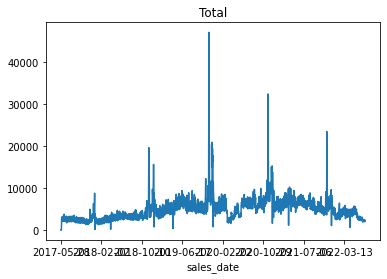

In [134]:
hierarchy_df['total'].plot(title="Total")

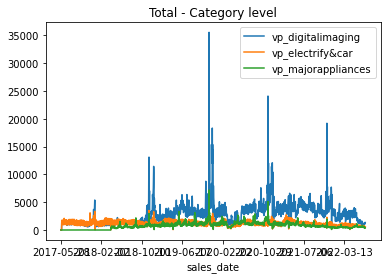

In [135]:
ax = hierarchy_df[hierarchy['total']].plot(title="Total - Category level")
ax.legend(bbox_to_anchor=(1.0, 1.0));

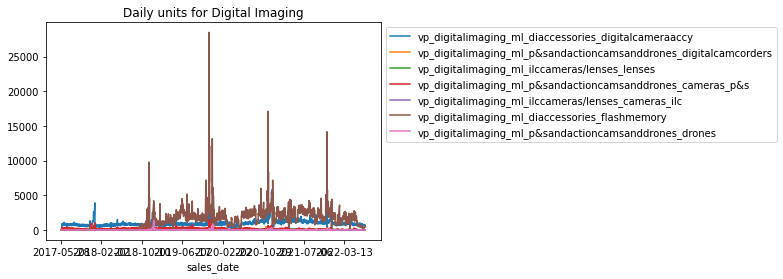

In [136]:
ax = hierarchy_df[hierarchy['vp_digitalimaging']].plot(title="Daily units for Digital Imaging")
ax.legend(bbox_to_anchor=(1.0, 1.0));

In [137]:
from hts.hierarchy import HierarchyTree

ht = HierarchyTree.from_nodes(nodes=hierarchy, df=hierarchy_df)


In [138]:
# print(ht.children[0].key)

# print(ht.children[0])

In [139]:
# hierarchy

In [140]:
# !pip install fbprophet

In [144]:
!pip install scikit-hts[prophet]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
  Running setup.py install for fbprophet

In [142]:
# sum(hierarchy_df.isna().sum())

In [ ]:
from hts import HTSRegressor

# clf = HTSRegressor(model='prophet', revision_method='OLS', n_jobs=12)
clf = HTSRegressor(model='prophet', revision_method='AHP', n_jobs=0)
model = clf.fit(hierarchy_df, hierarchy)

Fitting models:   8%|▊         | 56/724 [00:58<10:03,  1.11it/s]INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
preds = model.predict(steps_ahead=7)

In [ ]:
data.head()